1: Import Library dan Load Dataset




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

filename = 'Sleep_health_and_lifestyle_dataset.csv'
df = pd.read_csv(filename)

print("Langkah 1 Berhasil: Dataset sudah dimuat.")
display(df.head())

Langkah 1 Berhasil: Dataset sudah dimuat.


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


2: Pembersihan dan Preprocessing

In [ ]:
# 1. Mengisi nilai kosong pada Sleep Disorder
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

# 2. PERBAIKAN BARU: Satukan 'Normal Weight' ke 'Normal'
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

# 3. Hapus kolom yang tidak perlu
df_bersih = df.drop(['Person ID', 'Blood Pressure'], axis=1)

# 4. Label Encoding (Mengubah Teks ke Angka)
le = LabelEncoder()
kolom_teks = ['Gender', 'Occupation', 'BMI Category', 'Sleep Disorder']

print("\n=== Proses Mengubah Huruf ke Angka ===")
for col in kolom_teks:
  df_bersih[col] = le.fit_transform(df_bersih[col])
  # Kita print mapping-nya agar tahu angka berapa mewakili apa
  mapping = dict(zip(le.classes_, range(len(le.classes_))))
  print(f"Kolom '{col}': {mapping}")

print("\n Langkah 2 Berhasil: Data sudah bersih dan berupa angka semua.")
display(df_bersih.head())


=== Proses Mengubah Huruf ke Angka ===
Kolom 'Gender': {'Female': 0, 'Male': 1}
Kolom 'Occupation': {'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}
Kolom 'BMI Category': {'Normal': 0, 'Obese': 1, 'Overweight': 2}
Kolom 'Sleep Disorder': {'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}

 Langkah 2 Berhasil: Data sudah bersih dan berupa angka semua.


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,27,9,6.1,6,42,6,2,77,4200,1
1,1,28,1,6.2,6,60,8,0,75,10000,1
2,1,28,1,6.2,6,60,8,0,75,10000,1
3,1,28,6,5.9,4,30,8,1,85,3000,2
4,1,28,6,5.9,4,30,8,1,85,3000,2


3: Pembagian Data & Normalisisasi

In [ ]:
target = 'Stress Level'
X = df_bersih.drop(target, axis=1)
y = df_bersih[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Langkah 3 Berhasil: Data sudah dibagi dan diskalakan.")
print(f"Jumlah Data Latih: {X_train.shape[0]} baris")
print(f"Jumlah Data Uji : {X_test.shape[0]} baris")

Langkah 3 Berhasil: Data sudah dibagi dan diskalakan.
Jumlah Data Latih: 274 baris
Jumlah Data Uji : 100 baris


4: Pelatihan Model

In [ ]:
k_value = 5
metrik = 'euclidean'

print(f"Sedang melatih AI dengan K={k_value} dan metode {metrik }...")

knn = KNeighborsClassifier(n_neighbors=k_value, metric=metrik)

knn.fit(X_train, y_train)

print("Model AI siap diuji")

Sedang melatih AI dengan K=5 dan metode euclidean...
Model AI siap diuji


5: Evaluasi


 Akurasi Model: 89.00%


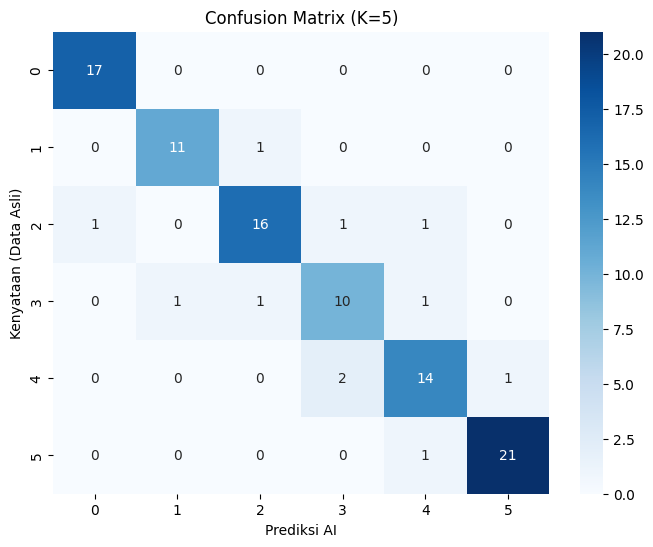


=== Classification Report ===
              precision    recall  f1-score   support

           3       0.94      1.00      0.97        17
           4       0.92      0.92      0.92        12
           5       0.89      0.84      0.86        19
           6       0.77      0.77      0.77        13
           7       0.82      0.82      0.82        17
           8       0.95      0.95      0.95        22

    accuracy                           0.89       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [ ]:
y_pred = knn.predict(X_test)

akurasi = accuracy_score(y_test, y_pred)
print(f"\n Akurasi Model: {akurasi * 100:.2f}%")

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix (K={k_value})')
plt.xlabel('Prediksi AI')
plt.ylabel('Kenyataan (Data Asli)')
plt.show()

print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

### 6: Uji Coba AI Secara Manual

Anda dapat menguji model AI secara manual dengan mengisi nilai-nilai di bawah ini. Pastikan untuk memasukkan nilai yang sesuai.

**Panduan untuk Kolom Kategorikal (sudah diubah ke angka):**
*   **Gender**: (Female), (Male)
*   **Occupation**:

 - Accountant (Akuntan)

 - Doctor (Dokter)

 - Engineer (Insinyur)

 - Lawyer (Pengacara)

 - Manager (Manajer)

 - Nurse (Perawat)

 - Sales Representative (Perwakilan Penjualan)

 - Salesperson (Tenaga Penjualan)

 - Scientist (Ilmuwan)

 - Software Engineer (Insinyur Perangkat Lunak)

 - Teacher (Guru)
*   **BMI Category**: (Normal), (Obese), (Overweight)
*   **Sleep Disorder**: (None), (Insomnia), (Sleep Apnea)

In [ ]:
import pandas as pd
import numpy as np

# --- 1. MEMBUAT INPUT DENGAN TEXT (DROPDOWN) ---
# @title Uji Coba Model dengan Data Baru

# Input Data Numerik
Age = 35 # @param {type: "integer"}
Sleep_Duration = 7.5 # @param {type: "number"}
Quality_of_Sleep = 8 # @param {type: "integer"}
Physical_Activity_Level = 60 # @param {type: "integer"}
Heart_Rate = 70 # @param {type: "integer"}
Daily_Steps = 8000 # @param {type: "integer"}

# Input Data Kategori (Pilih Teks)
Gender_Input = "Male" # @param ["Male", "Female"]
Occupation_Input = "Software Engineer" # @param ["Accountant", "Doctor", "Engineer", "Lawyer", "Manager", "Nurse", "Sales Representative", "Salesperson", "Scientist", "Software Engineer", "Teacher"]
# Catatan: BMI hanya 3 pilihan karena "Normal Weight" sudah digabung ke "Normal"
BMI_Category_Input = "Normal" # @param ["Normal", "Obese", "Overweight"]
Sleep_Disorder_Input = "None" # @param ["None", "Insomnia", "Sleep Apnea"]

# --- 2. KAMUS PENERJEMAH (TEXT KE ANGKA) ---
# Disesuaikan dengan hasil LabelEncoder di Langkah 2 (setelah penggabungan BMI)

gender_map = {"Female": 0, "Male": 1}

occupation_map = {
    "Accountant": 0, "Doctor": 1, "Engineer": 2, "Lawyer": 3,
    "Manager": 4, "Nurse": 5, "Sales Representative": 6,
    "Salesperson": 7, "Scientist": 8, "Software Engineer": 9, "Teacher": 10
}

# Mapping baru untuk BMI (Normal Weight sudah hilang)
bmi_map = {
    "Normal": 0, "Obese": 1, "Overweight": 2
}

sleep_disorder_map = {
    "Insomnia": 0, "None": 1, "Sleep Apnea": 2
}

# --- 3. PROSES KONVERSI & PREDIKSI ---

try:
    # Mengubah input teks menjadi angka
    Gender = gender_map[Gender_Input]
    Occupation = occupation_map[Occupation_Input]
    BMI_Category = bmi_map[BMI_Category_Input]
    Sleep_Disorder = sleep_disorder_map[Sleep_Disorder_Input]

    # Membuat DataFrame
    input_data = pd.DataFrame({
        'Gender': [Gender],
        'Age': [Age],
        'Occupation': [Occupation],
        'Sleep Duration': [Sleep_Duration],
        'Quality of Sleep': [Quality_of_Sleep],
        'Physical Activity Level': [Physical_Activity_Level],
        'Stress Level': [0], # Dummy
        'BMI Category': [BMI_Category],
        'Heart Rate': [Heart_Rate],
        'Daily Steps': [Daily_Steps],
        'Sleep Disorder': [Sleep_Disorder]
    })

    # Filter kolom agar sesuai urutan training
    fitur_cols = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
                  'Physical Activity Level', 'BMI Category', 'Heart Rate',
                  'Daily Steps', 'Sleep Disorder']

    input_siap = input_data[fitur_cols]

    print("\nData Input (Terkonversi):")
    display(input_siap)

    # Scaling
    input_scaled = scaler.transform(input_siap)

    # Prediksi
    prediksi_angka = knn.predict(input_scaled)[0]

    # --- 4. OUTPUT HASIL ---
    kategori_stres = {
        3: "Sangat Rendah (Santai)",
        4: "Rendah",
        5: "Sedang",
        6: "Cukup Tinggi (Waspada)",
        7: "Tinggi (Bahaya)",
        8: "Sangat Tinggi (Butuh Istirahat)"
    }

    deskripsi = kategori_stres.get(prediksi_angka, "Tidak Terdefinisi")

    print("="*40)
    print(f"HASIL PREDIKSI AI:")
    print(f"Skor Stres : {prediksi_angka}")
    print(f"Kategori   : {deskripsi}")
    print("="*40)

except Exception as e:
    print(f"Terjadi kesalahan: {e}")


Data Input (Terkonversi):


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder
0,1,35,9,7.5,8,60,0,70,8000,1


HASIL PREDIKSI AI:
Skor Stres : 5
Kategori   : Sedang


### Penjelasan Tingkat Stres yang Diprediksi

Tingkat stres yang diprediksi oleh AI adalah nilai numerik yang merepresentasikan skala stres. Meskipun tidak ada definisi eksplisit dalam dataset untuk setiap angka, umumnya dapat diinterpretasikan sebagai berikut:

*   **3 - Sangat Rendah:** Stres minimal atau tidak ada.
*   **4 - Rendah:** Tingkat stres yang dapat diatasi, mungkin terkait dengan tantangan sehari-hari yang ringan.
*   **5 - Sedang:** Stres yang terasa, mungkin memerlukan perhatian atau penyesuaian.
*   **6 - Cukup Tinggi:** Stres yang signifikan, bisa memengaruhi aktivitas atau kesejahteraan.
*   **7 - Tinggi:** Tingkat stres yang serius, mungkin membutuhkan strategi penanganan atau bantuan.
*   **8 - Sangat Tinggi:** Stres yang sangat parah, berpotensi mengganggu fungsi normal secara signifikan.